<a href="https://colab.research.google.com/github/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive/blob/main/10/10_note_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Density Based Clustering Part3

170. HDBSCAN python library (hdbscan)
171. Demo: Implementing HDBSCAN (partial implementation)
172. HDBSCAN general guideliness
173. Demo: Clustering iris and digits (mnist784) with HDBSCAN
174. Demo: Clustering animals with HDBSCAN (categorical data)
175. Robust scaler (demo prerequisite)
176. Demo: Clustering phones with HDBSCAN (mixed data)
177. Case study: Geospatial clustering with DBSCAN and HDBSCAN - introduction
178. Case study: Geospatial clustering with DBSCAN and HDBSCAN
179. Chapter summary

#### API - HDBSCAN

<font size='4'>

```python
class hdbscan.hdbscan_.HDBSCAN(min_cluster_size=5, min_samples=None, cluster_selection_epsilon=0.0, max_cluster_size=0,
  metric='euclidean', alpha=1.0, p=None, algorithm='best', leaf_size=40, memory=Memory(location=None),
  approx_min_span_tree=True, gen_min_span_tree=False, core_dist_n_jobs=4, cluster_selection_method='eom',
  allow_single_cluster=False, prediction_data=False, branch_detection_data=False, match_reference_implementation=False,
  cluster_selection_epsilon_max=inf, **kwargs)
```

</font>

methods:

<font size='4'>


```python
fit(X)
fit_predict(X)
```

</font>


attributes:

<font size='4'>

```python
labels_ # cluster id (noise point 為 -1)
probabilities_ # point 屬於該 cluster 成員的機率 (noise 為 0)
outlier_scores_ # [0, 1] outlier score; 表示 point 有多像 outlier
relative_validity_ # 每個 cluster 的 DBCV 近似值
single_linkage_tree_
condensed_tree_
minimum_spanning_tree_
```

</font>


#### HDBSCAB Parameters

- `min_samples`: 計算 core distance
  - 高值: 較多 noise
    - 高 core distance -> 高 reachability distance
  - 低值: 較少 noise
- `min_cluster_size`: 建構 condensed tree 時用到
  - 若兩個 branch 的 point 數目都 > `min_cluster_size`, 則維持拆分的 branch
  - 高值: 較少 cluster
    - 維持拆分的條件難達到 -> 常常合併 branch
  - 低值: 較多 cluster
  

#### HDBSCAN 的限制

- parameter 需要 tune
- feature 數太大時 (>100), 效率不佳 # todo_spencer
- 可處理不同 density 的 clusters, 但較難處理內部 density 差異很大的 cluster # todo_spencer

#### HDBSCAN 結果

##### mnist dataset

true label:

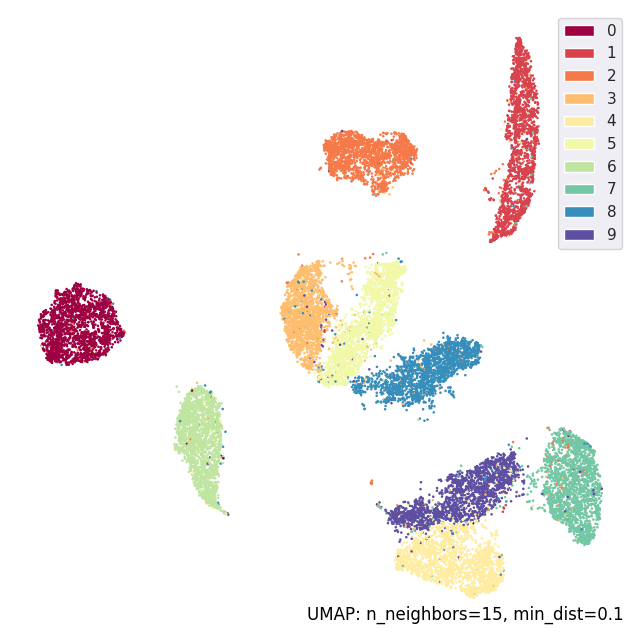

HDBSCAN:

<pre>
ARI : 0.0620451604091957
ARI sub : 0.9949149740514572
noise size : 14873
Silouethe : -0.0946336623562824
Silouethe sub : 0.1854009565723897
DBCV : 0.0275406710127663
</pre>

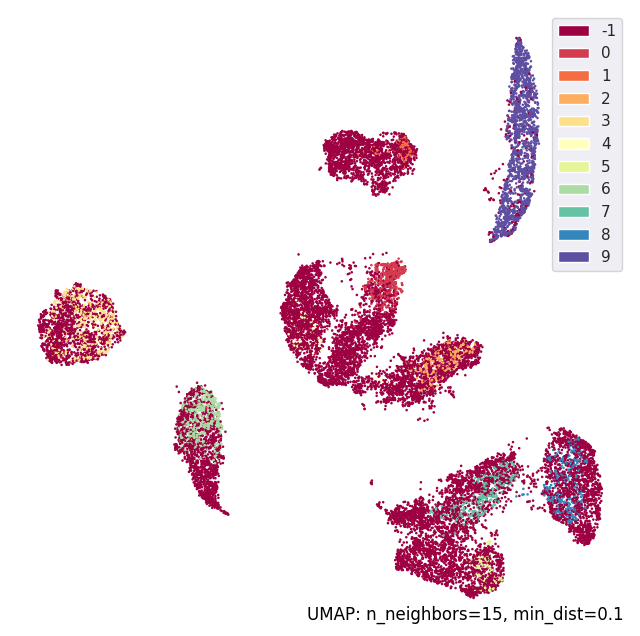

##### iris dataset

true label:

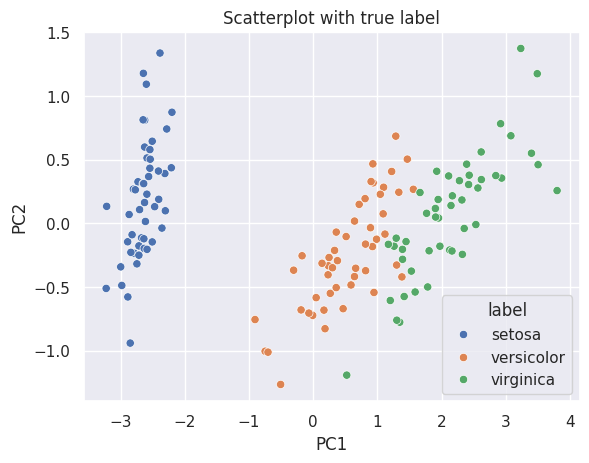

HDBSCAN:

<pre>
ARI : 0.5681159420289855
ARI sub : 0.5681159420289855
noise size : 0
Silouethe : 0.6867350732769777
Silouethe sub : 0.5034774406932961
DBCV : 0.6204492461686135
</pre>

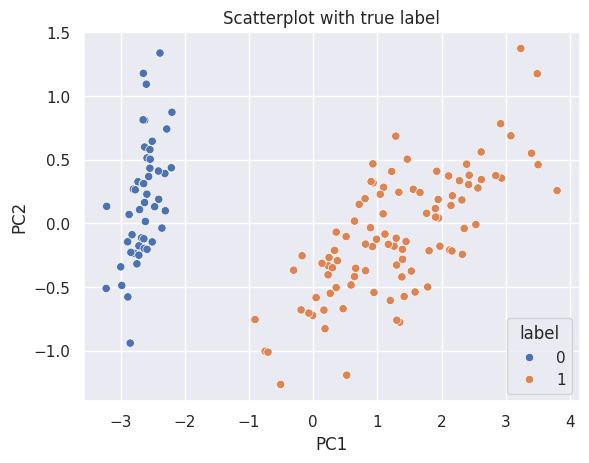

##### animal zoo dataset (categorical data)

true label:

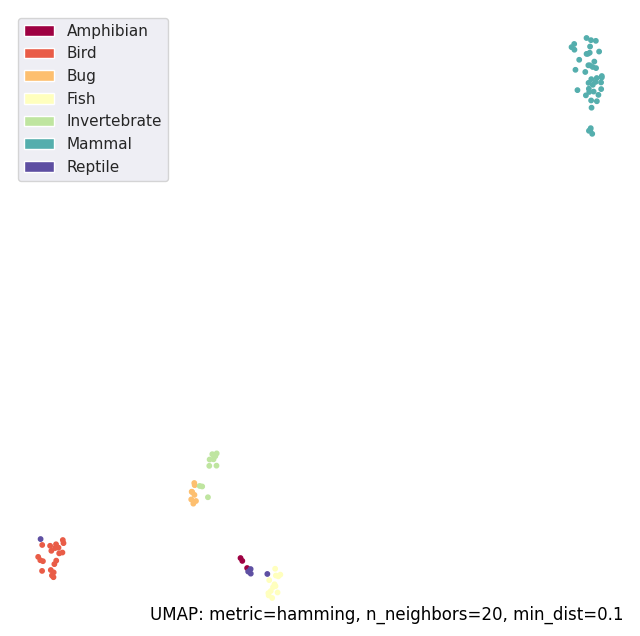

HDBSCAN:

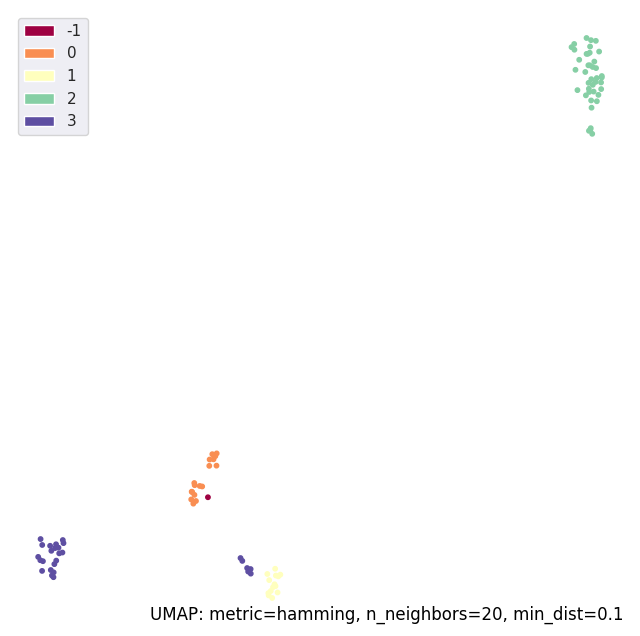

#### RobustScaler

$scaled\_x=\frac{x-median}{IQR}$

- 好處:
  - 能夠抵抗 outlier
  - 可以處理在某種程度上 skewed 的 feature
- 壞處:
  - 與 StandardScalar 相比, 值域較大

#### API - RobustScaler

<font size='4'>

```python
class sklearn.preprocessing.RobustScaler(*, with_centering=True,
  with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)
```

</font>

methods:

<font size='4'>


```python
fit() # 計算 median、IQR
predict() # scaling
fit_predict()
```

</font>
